In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [3]:
ce5['loggedtime']= ce5[0].apply(lambda x : x[:19])
ce5['jobname'] = ce5[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])
ce5['respoonseTime'] = ce5[3].apply(lambda x : x.split('.')[0][5:])
ce5['user'] = ce5[1].apply(lambda x : x[5:])
ce5['retry']= ce5[2].apply(lambda x : x[6:])
ce5['returncode']= ce5[4].apply(lambda x : x[11:])

In [4]:
#cleaned frame
ce5.head()

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:15:39,sacct,0,0,0,0
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:18:08,sacct,0,0,0,0
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:22:48,sacct,0,0,0,0
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:25:13,sacct,0,0,0,0
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:31:01,sacct,0,0,0,0


In [5]:
#Lets grab the cleaned columns.
ce5log_df = ce5.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [6]:
#ce5log_date_returncode_group_df=ce5log_df.groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','returncode']]
#ce5log_date_returncode_group_df

In [7]:
#lets convert the log time to date time so that we can sort to see the pattern
#ce5log_date_returncode_group_df['loggedtime'] = pd.to_datetime(ce5log_date_returncode_group_df['loggedtime'],errors='coerce')
#ce5log_date_returncode_group_df

In [8]:
#ce5log_date_returncode_group_df['date'] = ce5log_date_returncode_group_df['loggedtime'].dt.date
#ce5log_date_returncode_group_df['returncode'] = ce5log_date_returncode_group_df['returncode'].astype('int')
#ce5log_date_returncode_group_df

In [9]:
# ce5log_date_returncode_group_df['modReturnCode'] = ce5log_date_returncode_group_df['returncode'].apply(
#     lambda x : 0 if x != 0 and x!= 1 else x
# )
# ce5log_date_returncode_group_df

In [10]:
#ce5log_date_returncode_group_df['date'] = pd.to_datetime(
#    ce5log_date_returncode_group_df['date']
#)
#ce5log_date_returncode_group_df

In [11]:
#checkdf = ce5log_date_returncode_group_df[(
#    (ce5log_date_returncode_group_df['loggedtime'] >= '2021-08-01 06:48:00')
#    &
#    (ce5log_date_returncode_group_df['loggedtime'] <= '2021-08-31 06:48:49')
#)]
#checkdf

In [12]:
#checkdf['returncode'].unique()

In [13]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates


# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(checkdf['loggedtime'], checkdf['returncode'])
# plt.xlabel('Time')
# plt.ylabel('counts')
# plt.title('Data')

# # Format the x-axis for hourly data
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## below is specific to batch type

In [14]:
ce5log_df_sbatch = ce5log_df[ce5log_df['jobname'] == 'sbatch']

In [15]:
ce5log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
29,2020-10-16 08:32:25,9201,sbatch,0,0,0
30,2020-10-16 08:32:25,9201,sbatch,0,0,0
34,2020-10-16 08:32:53,9201,sbatch,0,0,0
35,2020-10-16 08:32:53,9201,sbatch,0,0,0
36,2020-10-16 08:32:53,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4770843,2021-10-07 21:44:59,9204,sbatch,0,0,0
4770868,2021-10-07 21:53:47,9204,sbatch,0,0,0
4770871,2021-10-07 21:54:51,9203,sbatch,0,0,0
4770873,2021-10-07 21:55:01,9203,sbatch,0,0,0


In [16]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_date_returncode_group_df=ce5log_df_sbatch[(ce5log_df_sbatch['returncode'].astype('int') == 1) & (ce5log_df_sbatch['respoonseTime'].astype('int') > 15) ].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


In [17]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


In [18]:
#lets sort the date and time for further processing , also rename the user column to count
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','count'],ascending=[True,True])
ce5log_sbatch_date_returncode_group_df
#ce5log_sbatch_date_returncode_group_df= ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
#ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


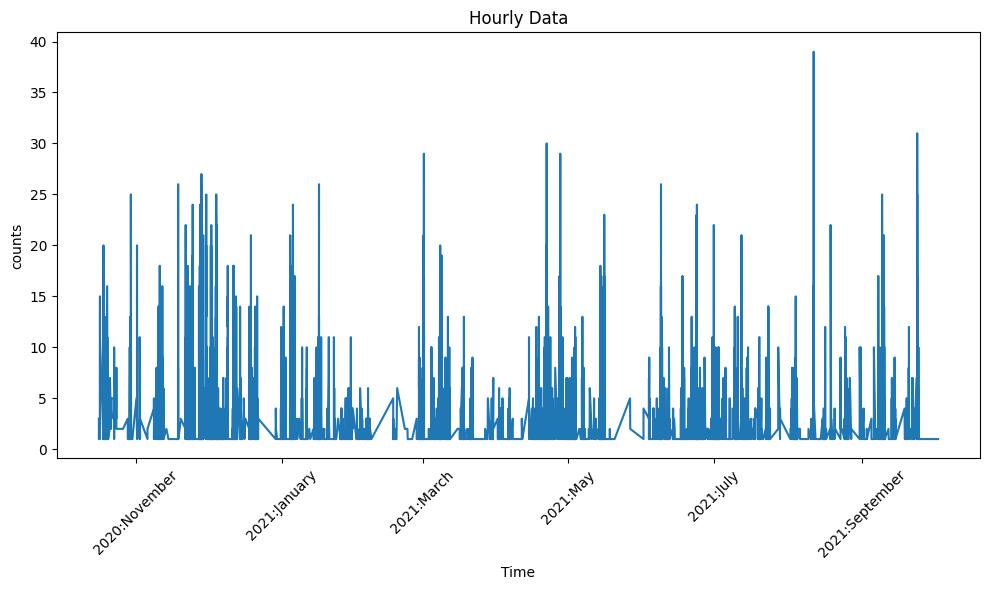

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce5log_sbatch_date_returncode_group_df['loggedtime'], ce5log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
oct2020= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-08-11'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-08-12'
)]
oct2020

,loggedtime,count
18848,2021-08-11 10:28:19,1
18849,2021-08-11 12:56:55,2
18850,2021-08-11 13:10:37,1
18851,2021-08-11 13:10:38,6
18852,2021-08-11 13:10:39,6
...,...,...
18926,2021-08-11 17:05:07,10
18927,2021-08-11 17:05:08,1
18928,2021-08-11 17:05:09,3
18929,2021-08-11 17:05:10,9


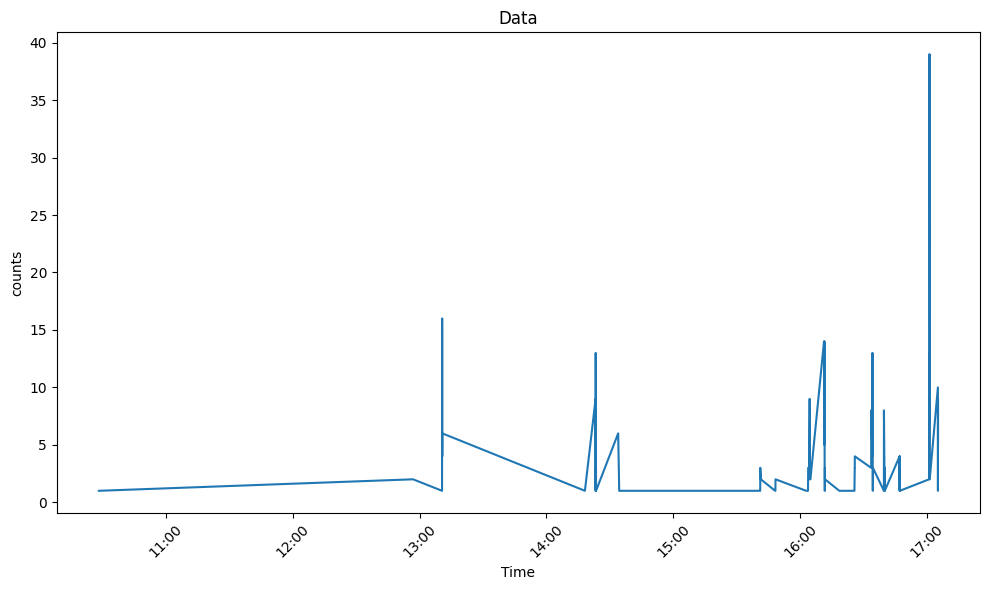

In [21]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(oct2020['loggedtime'], oct2020['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
#since there are more records given time, lets shrink it and limit to Date ,HH and MM by grouping by loggedtime
ce5log_sbatch_date_returncode_group_df['dateHHMM'] = pd.to_datetime(ce5log_sbatch_date_returncode_group_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce5log_sbatch_date_returncode_group_df

,loggedtime,count,dateHHMM
0,2020-10-16 11:43:45,3,2020-10-16 11:43:00
1,2020-10-16 11:43:46,2,2020-10-16 11:43:00
2,2020-10-16 11:43:54,1,2020-10-16 11:43:00
3,2020-10-16 22:21:13,1,2020-10-16 22:21:00
4,2020-10-16 22:21:33,1,2020-10-16 22:21:00
...,...,...,...
19894,2021-09-24 19:13:14,1,2021-09-24 19:13:00
19895,2021-09-24 20:16:31,1,2021-09-24 20:16:00
19896,2021-10-02 08:14:16,1,2021-10-02 08:14:00
19897,2021-10-02 17:28:16,1,2021-10-02 17:28:00


In [23]:
#Now lets do the count per Date,HH and MM
batchHHMM_df = ce5log_sbatch_date_returncode_group_df[['dateHHMM','count']].groupby('dateHHMM').sum('count').reset_index()
batchHHMM_df.head()

,dateHHMM,count
0,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,9
3,2020-10-16 22:26:00,5
4,2020-10-16 22:33:00,21


In [24]:
#Lets check some sample date ranges
checkdf = batchHHMM_df[(
    (batchHHMM_df['dateHHMM'] >= '2020-12-04 00:00:00')
    &
    (batchHHMM_df['dateHHMM'] <= '2020-12-05 23:55:00')
)]
checkdf

,dateHHMM,count
1814,2020-12-04 05:22:00,5
1815,2020-12-04 05:23:00,5
1816,2020-12-04 09:46:00,3
1817,2020-12-04 09:47:00,3
1818,2020-12-04 10:00:00,1
...,...,...
2149,2020-12-05 22:49:00,1
2150,2020-12-05 22:55:00,2
2151,2020-12-05 22:56:00,2
2152,2020-12-05 23:06:00,1


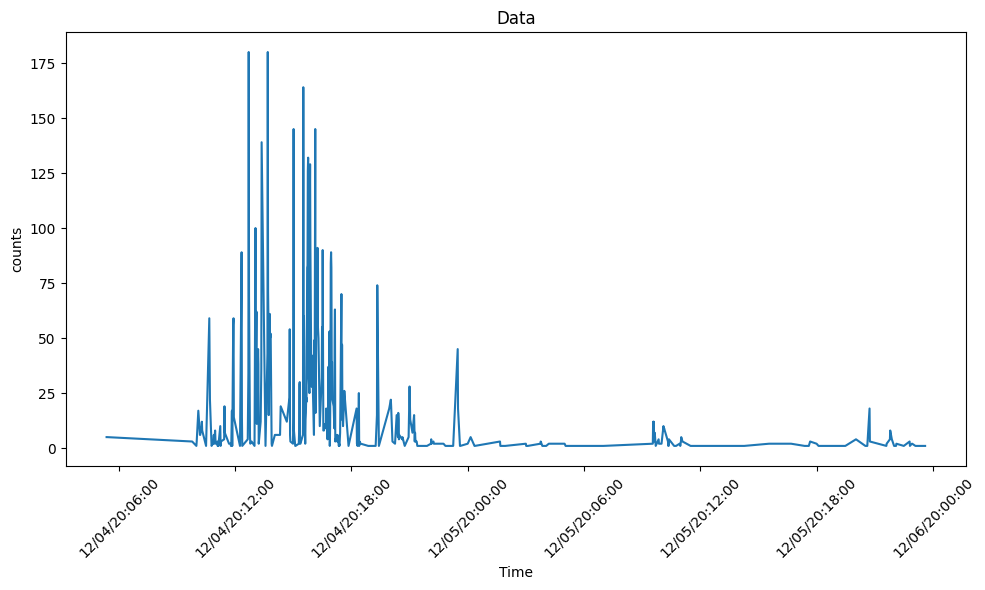

In [25]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lets calculate the return coode 0 successful processing.. 

In [26]:
#look for return code = 0 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_zero_df=ce5log_df_sbatch[ce5log_df_sbatch['returncode'].astype('int') == 0].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
#ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})

#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_zero_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_zero_df['loggedtime'],
    errors='coerce'
)

ce5log_sbatch_zero_df = ce5log_sbatch_zero_df.sort_values(by=['loggedtime','user'],ascending=[True,True])
ce5log_sbatch_zero_df=ce5log_sbatch_zero_df.rename(columns={'user':'countZero'})
ce5log_sbatch_zero_df['dateHHMMzero'] = pd.to_datetime(ce5log_sbatch_zero_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce5log_sbatch_zero_df

,loggedtime,countZero,dateHHMMzero
0,2020-10-16 08:32:25,2,2020-10-16 08:32:00
1,2020-10-16 08:32:53,8,2020-10-16 08:32:00
2,2020-10-16 08:33:03,15,2020-10-16 08:33:00
3,2020-10-16 08:33:04,3,2020-10-16 08:33:00
4,2020-10-16 08:33:06,5,2020-10-16 08:33:00
...,...,...,...
303315,2021-10-07 21:44:59,1,2021-10-07 21:44:00
303316,2021-10-07 21:53:47,1,2021-10-07 21:53:00
303317,2021-10-07 21:54:51,1,2021-10-07 21:54:00
303318,2021-10-07 21:55:01,1,2021-10-07 21:55:00


In [27]:
batchHHMM_zero_df = ce5log_sbatch_zero_df[['dateHHMMzero','countZero']].groupby('dateHHMMzero').sum('countZero').reset_index()
batchHHMM_zero_df.head()

,dateHHMMzero,countZero
0,2020-10-16 08:32:00,10
1,2020-10-16 08:33:00,35
2,2020-10-16 08:34:00,45
3,2020-10-16 08:36:00,3
4,2020-10-16 08:37:00,29


In [28]:
#Lets now see the return code 1 and returncode 0 comparision for specific date
checkdf = batchHHMM_df[(
    (batchHHMM_df['dateHHMM'] >= '2020-12-01 23:00:00')
    &
    (batchHHMM_df['dateHHMM'] <= '2020-12-02 00:15:00')
)]
checkdf.head()

,dateHHMM,count


In [29]:
checkdfzero = batchHHMM_zero_df[(
    (batchHHMM_zero_df['dateHHMMzero'] >= '2020-12-01 21:00:00')
    &
    (batchHHMM_zero_df['dateHHMMzero'] <= '2020-12-02 00:15:00')
)]
checkdfzero

,dateHHMMzero,countZero
32420,2020-12-01 21:00:00,1
32421,2020-12-01 21:01:00,4
32422,2020-12-01 21:07:00,6
32423,2020-12-01 21:08:00,4
32424,2020-12-01 21:09:00,2
...,...,...
32516,2020-12-02 00:09:00,6
32517,2020-12-02 00:12:00,1
32518,2020-12-02 00:13:00,3
32519,2020-12-02 00:14:00,24


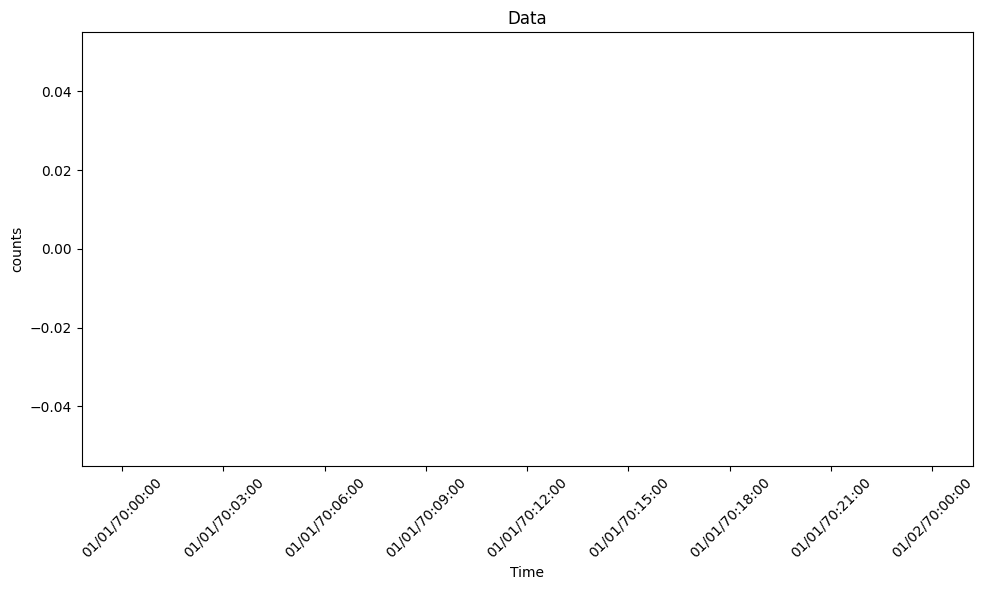

In [30]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

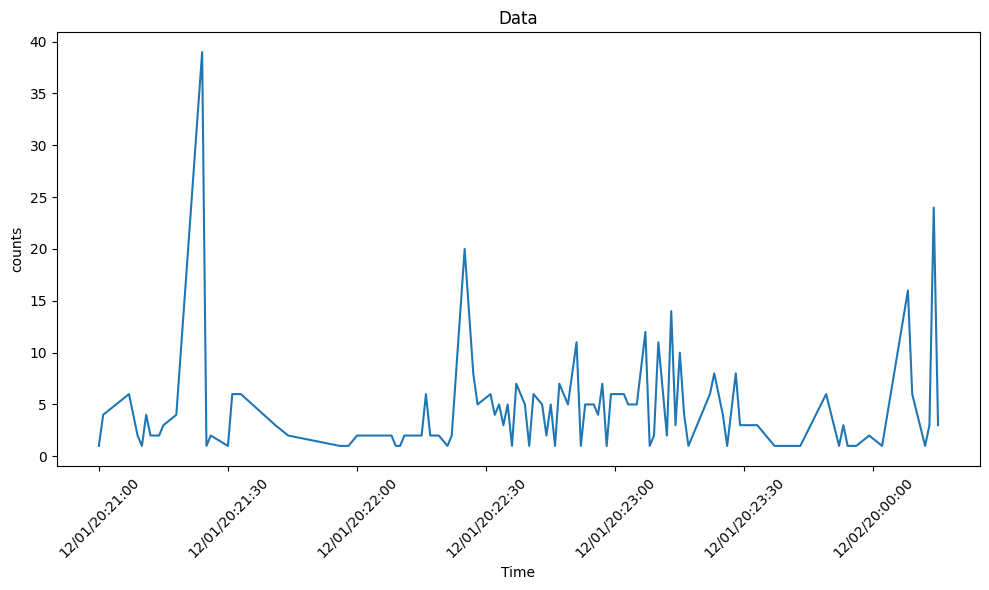

In [31]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdfzero['dateHHMMzero'], checkdfzero['countZero'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lets start ce6 log file processing

In [32]:
ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce6.head()

,0,1,2,3,4,5
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [33]:
ce6['loggedtime']= ce6[0].apply(lambda x : x[:19])
ce6['jobname'] = ce6[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])
ce6['respoonseTime'] = ce6[3].apply(lambda x : x.split('.')[0][5:])
ce6['user'] = ce6[1].apply(lambda x : x[5:])
ce6['retry']= ce6[2].apply(lambda x : x[6:])
ce6['returncode']= ce6[4].apply(lambda x : x[11:])

In [34]:
ce6.head()

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0


In [35]:
#Lets grab the cleaned columns.
ce6log_df = ce6.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [36]:
#batch jobs
ce6log_df_sbatch = ce6log_df[ce6log_df['jobname'] == 'sbatch']
ce6log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
13,2020-10-16 10:38:29,9204,sbatch,0,0,0
39,2020-10-16 10:41:08,9201,sbatch,0,0,0
40,2020-10-16 10:41:08,9201,sbatch,0,0,0
41,2020-10-16 10:41:08,9201,sbatch,0,0,0
50,2020-10-16 10:42:51,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4776444,2021-10-07 21:39:15,9204,sbatch,0,0,0
4776494,2021-10-07 21:54:50,9203,sbatch,0,0,0
4776495,2021-10-07 21:54:50,9203,sbatch,0,0,0
4776496,2021-10-07 21:55:00,9203,sbatch,0,0,0


In [37]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce6log_sbatch_date_returncode_group_df=ce6log_df_sbatch[(ce6log_df_sbatch['returncode'].astype('int') == 1) & (ce6log_df_sbatch['respoonseTime'].astype('int') > 15) ].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
ce6log_sbatch_date_returncode_group_df = ce6log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


In [38]:
#lets convert the log time to date time so that we can sort to see the pattern
ce6log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce6log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


In [39]:
#sort by date and rename 
ce6log_sbatch_date_returncode_group_df = ce6log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','count'],ascending=[True,True])
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


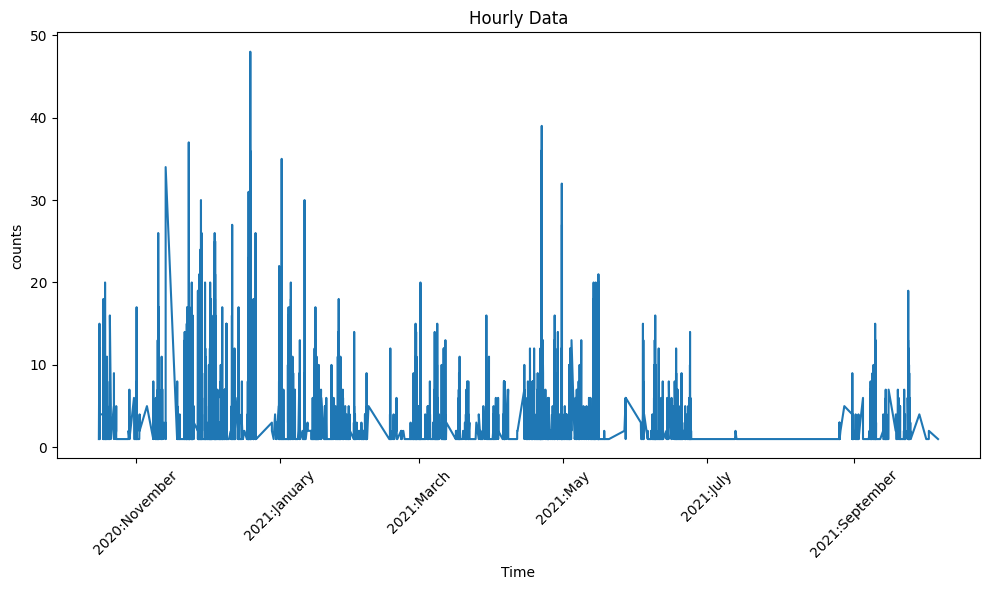

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce6log_sbatch_date_returncode_group_df['loggedtime'], ce6log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#Lets get the time in HHMM so that we can grab overlapping time failure
ce6log_sbatch_date_returncode_group_df['dateHHMM'] = pd.to_datetime(ce6log_sbatch_date_returncode_group_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce6log_sbatch_date_returncode_group_df.head()

,loggedtime,count,dateHHMM
0,2020-10-16 11:43:49,1,2020-10-16 11:43:00
1,2020-10-16 17:43:27,15,2020-10-16 17:43:00
2,2020-10-16 22:21:26,2,2020-10-16 22:21:00
3,2020-10-16 22:21:31,2,2020-10-16 22:21:00
4,2020-10-16 22:21:46,2,2020-10-16 22:21:00


In [42]:
ce6batchHHMM_df = ce6log_sbatch_date_returncode_group_df[['dateHHMM','count']].groupby('dateHHMM').sum('count').reset_index()
ce6batchHHMM_df

,dateHHMM,count
0,2020-10-16 11:43:00,1
1,2020-10-16 17:43:00,15
2,2020-10-16 22:21:00,8
3,2020-10-16 22:31:00,16
4,2020-10-16 22:38:00,41
...,...,...
7509,2021-10-02 16:01:00,1
7510,2021-10-02 17:48:00,1
7511,2021-10-02 18:08:00,1
7512,2021-10-02 18:18:00,2


In [43]:
# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(ce6checkdf['dateHHMM'], ce6checkdf['count'])
# plt.xlabel('Time')
# plt.ylabel('counts')
# plt.title('Data')

# # Format the x-axis for hourly data
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
# #plt.gca().xaxis.set_major_locator(mdates.HourLocator())

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

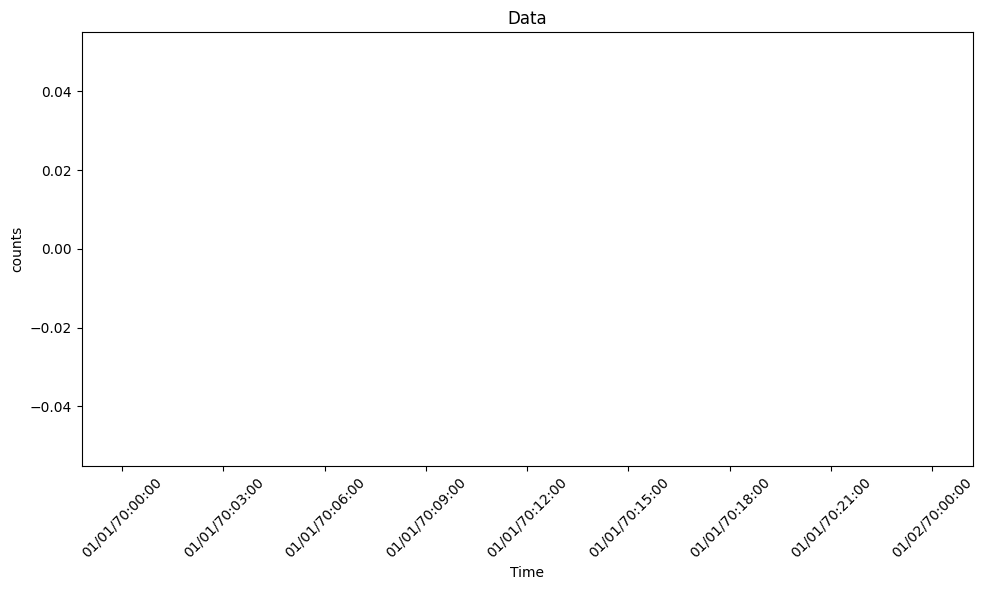

In [44]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
batchHHMM_df

,dateHHMM,count
0,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,9
3,2020-10-16 22:26:00,5
4,2020-10-16 22:33:00,21
...,...,...
8312,2021-09-24 19:13:00,1
8313,2021-09-24 20:16:00,1
8314,2021-10-02 08:14:00,1
8315,2021-10-02 17:28:00,1


In [46]:
ce6batchHHMM_df['c6yymm'] =ce6batchHHMM_df['dateHHMM'].dt.strftime('%Y-%m')

In [47]:
batchHHMM_df['c5yymm']  =batchHHMM_df['dateHHMM'].dt.strftime('%Y-%m')
batchHHMM_df.head()

,dateHHMM,count,c5yymm
0,2020-10-16 11:43:00,6,2020-10
1,2020-10-16 22:21:00,2,2020-10
2,2020-10-16 22:25:00,9,2020-10
3,2020-10-16 22:26:00,5,2020-10
4,2020-10-16 22:33:00,21,2020-10


In [48]:
ce6batchHHMM_df.head()

,dateHHMM,count,c6yymm
0,2020-10-16 11:43:00,1,2020-10
1,2020-10-16 17:43:00,15,2020-10
2,2020-10-16 22:21:00,8,2020-10
3,2020-10-16 22:31:00,16,2020-10
4,2020-10-16 22:38:00,41,2020-10


In [49]:
batchHHMM_df[batchHHMM_df['c5yymm'] == '2020-12'].groupby('c5yymm').count()

,dateHHMM,count
c5yymm,,
2020-12,1626,1626


In [50]:
ce6batchHHMM_df[ce6batchHHMM_df['c6yymm'] == '2020-12'].groupby('c6yymm').count()

,dateHHMM,count
c6yymm,,
2020-12,1695,1695


In [51]:
ce6log_sbatch_yymm_counts = ce6batchHHMM_df.groupby(['c6yymm']).count().reset_index()[['c6yymm','count']]
ce6log_sbatch_yymm_counts

,c6yymm,count
0,2020-10,137
1,2020-11,1201
2,2020-12,1695
3,2021-01,809
4,2021-02,286
5,2021-03,697
6,2021-04,809
7,2021-05,480
8,2021-06,699
9,2021-07,57


In [52]:
ce5log_sbatch_yymm_counts = batchHHMM_df.groupby(['c5yymm']).count().reset_index()[['c5yymm','count']]
ce6log_sbatch_yymm_counts = ce6log_sbatch_yymm_counts.rename(columns={'c6yymm':'c5-6yymm','count':'c6-count'})
ce5log_sbatch_yymm_counts = ce5log_sbatch_yymm_counts.rename(columns={'c5yymm':'c5-6yymm','count':'c5-count'})

In [53]:
ce5log_sbatch_yymm_counts

,c5-6yymm,c5-count
0,2020-10,141
1,2020-11,1124
2,2020-12,1626
3,2021-01,799
4,2021-02,225
5,2021-03,657
6,2021-04,804
7,2021-05,442
8,2021-06,957
9,2021-07,658


In [54]:
ce6log_sbatch_yymm_counts

,c5-6yymm,c6-count
0,2020-10,137
1,2020-11,1201
2,2020-12,1695
3,2021-01,809
4,2021-02,286
5,2021-03,697
6,2021-04,809
7,2021-05,480
8,2021-06,699
9,2021-07,57


In [55]:
yymm0megred_df = pd.merge(left=ce5log_sbatch_yymm_counts, right=ce6log_sbatch_yymm_counts,how='inner')

In [56]:
yymm0megred_df

,c5-6yymm,c5-count,c6-count
0,2020-10,141,137
1,2020-11,1124,1201
2,2020-12,1626,1695
3,2021-01,799,809
4,2021-02,225,286
5,2021-03,657,697
6,2021-04,804,809
7,2021-05,442,480
8,2021-06,957,699
9,2021-07,658,57


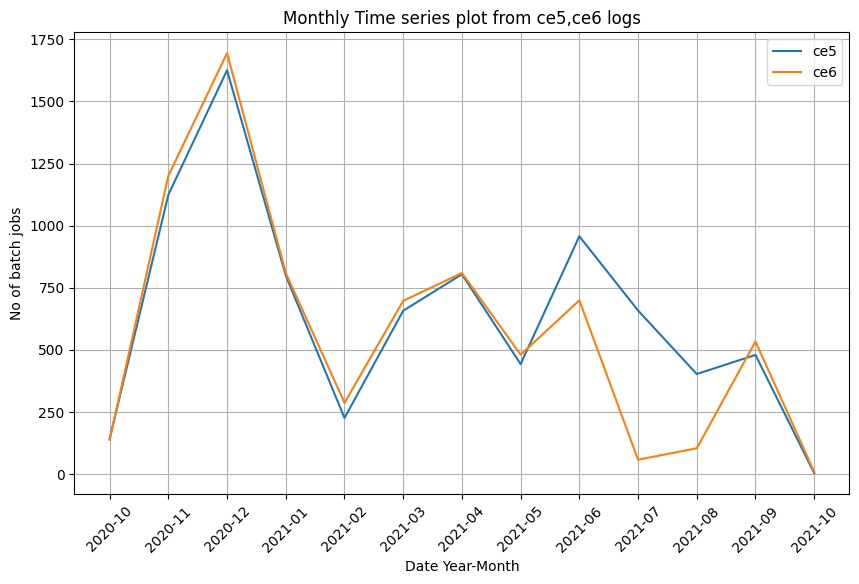

In [57]:
# Plotting multiple time series
plt.figure(figsize=(10, 6))
plt.plot(yymm0megred_df['c5-6yymm'], yymm0megred_df['c5-count'], label='ce5')
plt.plot(yymm0megred_df['c5-6yymm'], yymm0megred_df['c6-count'], label='ce6')

# Adding labels and title
plt.xlabel('Date Year-Month')
plt.ylabel('No of batch jobs')
plt.title('Monthly Time series plot from ce5,ce6 logs')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We will now focus on batchHHMM_df and ce6batchHHMM_df frames. We will see how many jobs failed for given date range. We will keep 15 jobs as treshhold per minute.

In [58]:
ce6batchHHMM_df.head()

,dateHHMM,count,c6yymm
0,2020-10-16 11:43:00,1,2020-10
1,2020-10-16 17:43:00,15,2020-10
2,2020-10-16 22:21:00,8,2020-10
3,2020-10-16 22:31:00,16,2020-10
4,2020-10-16 22:38:00,41,2020-10


In [59]:
ce6batchHHMM_df['avglast2jobs'] = ce6batchHHMM_df['count'].rolling(window=2).mean()
batchHHMM_df['avglast2jobs'] = batchHHMM_df['count'].rolling(window=2).mean()

In [60]:
ce6batchHHMM_df

,dateHHMM,count,c6yymm,avglast2jobs
0,2020-10-16 11:43:00,1,2020-10,NaN
1,2020-10-16 17:43:00,15,2020-10,8.0
2,2020-10-16 22:21:00,8,2020-10,11.5
3,2020-10-16 22:31:00,16,2020-10,12.0
4,2020-10-16 22:38:00,41,2020-10,28.5
...,...,...,...,...
7509,2021-10-02 16:01:00,1,2021-10,1.0
7510,2021-10-02 17:48:00,1,2021-10,1.0
7511,2021-10-02 18:08:00,1,2021-10,1.0
7512,2021-10-02 18:18:00,2,2021-10,1.5


In [141]:
ce6batchHHMM_df[ce6batchHHMM_df['avglast2jobs'] >=10.0 ]

,dateHHMM,count,c6yymm,avglast2jobs
2,2020-10-16 22:21:00,8,2020-10,11.5
3,2020-10-16 22:31:00,16,2020-10,12.0
4,2020-10-16 22:38:00,41,2020-10,28.5
5,2020-10-16 22:39:00,2,2020-10,21.5
7,2020-10-16 22:45:00,4,2020-10,10.0
...,...,...,...,...
7347,2021-09-24 01:52:00,21,2021-09,11.0
7348,2021-09-24 01:53:00,3,2021-09,12.0
7362,2021-09-24 02:27:00,15,2021-09,10.0
7400,2021-09-24 04:03:00,30,2021-09,18.0


In [142]:
ce5_batchHHMM_df_avg = batchHHMM_df[batchHHMM_df['avglast2jobs'] >=10.0 ].copy()
ce6_batchHHMM_df_avg = ce6batchHHMM_df[ce6batchHHMM_df['avglast2jobs'] >=10.0 ].copy()

In [143]:
ce5_batchHHMM_df_avg = ce5_batchHHMM_df_avg.reset_index(drop=True)
ce6_batchHHMM_df_avg = ce6_batchHHMM_df_avg.reset_index(drop=True)

In [144]:
ce5_batchHHMM_df_avg = ce5_batchHHMM_df_avg.set_index('dateHHMM')

In [145]:
ce5_batchHHMM_df_avg

,count,c5yymm,avglast2jobs
dateHHMM,,,
2020-10-16 22:33:00,21,2020-10,13.0
2020-10-16 22:37:00,60,2020-10,40.5
2020-10-16 22:40:00,60,2020-10,60.0
2020-10-16 22:43:00,8,2020-10,34.0
2020-10-18 05:54:00,15,2020-10,11.5
...,...,...,...
2021-09-24 01:17:00,22,2021-09,13.0
2021-09-24 01:18:00,5,2021-09,13.5
2021-09-24 01:29:00,18,2021-09,13.5


In [146]:
ce5_batchHHMM_df_avg

,count,c5yymm,avglast2jobs
dateHHMM,,,
2020-10-16 22:33:00,21,2020-10,13.0
2020-10-16 22:37:00,60,2020-10,40.5
2020-10-16 22:40:00,60,2020-10,60.0
2020-10-16 22:43:00,8,2020-10,34.0
2020-10-18 05:54:00,15,2020-10,11.5
...,...,...,...
2021-09-24 01:17:00,22,2021-09,13.0
2021-09-24 01:18:00,5,2021-09,13.5
2021-09-24 01:29:00,18,2021-09,13.5


In [152]:
batchHHMM_df = batchHHMM_df.set_index('dateHHMM')

In [153]:
# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]

# Define the time range for slicing
start_time = batchHHMM_df.index.min()
end_time = batchHHMM_df.index.max()

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = batchHHMM_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(df_slice.index[0])
        endTime.append(df_slice.index[-1])
        countNR.append(df_slice['count'].sum())  
    
    # Move to the next 10-minute window
    current_start = current_end

ce5_timeSlice_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'COUNTS': countNR
}
)
ce5_timeSlice_df.head

<bound method NDFrame.head of                BEGINTIME             ENDTIME  COUNTS
0    2020-10-16 11:43:00 2020-10-16 11:43:00       6
1    2020-10-16 22:21:00 2020-10-16 22:21:00       2
2    2020-10-16 22:25:00 2020-10-16 22:33:00      35
3    2020-10-16 22:33:00 2020-10-16 22:43:00     149
4    2020-10-16 22:43:00 2020-10-16 22:43:00       8
...                  ...                 ...     ...
4767 2021-09-24 19:13:00 2021-09-24 19:13:00       1
4768 2021-09-24 20:16:00 2021-09-24 20:16:00       1
4769 2021-10-02 08:14:00 2021-10-02 08:14:00       1
4770 2021-10-02 17:28:00 2021-10-02 17:28:00       1
4771 2021-10-02 18:29:00 2021-10-02 18:29:00       1

[4772 rows x 3 columns]>

In [166]:
ce5_timeSlice_df[ce5_timeSlice_df['COUNTS'] > 400].head(50)

,BEGINTIME,ENDTIME,COUNTS
593,2020-11-30 10:23:00,2020-11-30 10:27:00,406
836,2020-12-04 13:03:00,2020-12-04 13:13:00,403
850,2020-12-04 15:43:00,2020-12-04 15:53:00,810
852,2020-12-04 16:04:00,2020-12-04 16:13:00,440
2614,2021-04-21 20:23:00,2021-04-21 20:33:00,404
2615,2021-04-21 20:33:00,2021-04-21 20:43:00,456
2621,2021-04-21 21:33:00,2021-04-21 21:43:00,505
2622,2021-04-21 21:43:00,2021-04-21 21:53:00,434
2623,2021-04-21 21:53:00,2021-04-21 22:03:00,498


In [162]:
ce5_timeSlice_df

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 11:43:00,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,2020-10-16 22:33:00,35
3,2020-10-16 22:33:00,2020-10-16 22:43:00,149
4,2020-10-16 22:43:00,2020-10-16 22:43:00,8
...,...,...,...
4767,2021-09-24 19:13:00,2021-09-24 19:13:00,1
4768,2021-09-24 20:16:00,2021-09-24 20:16:00,1
4769,2021-10-02 08:14:00,2021-10-02 08:14:00,1
4770,2021-10-02 17:28:00,2021-10-02 17:28:00,1
